['水泥', '食品加工', '大宗物資', '飲料相關', '石化業', '化纖原料', '成衣', '紡織中游', '機械', '電力設備', '家電', '電線電纜', '電池材料相關', '化學工業', '橡膠工業', '建材', '居家用品', '造紙業', '線材、盤元', '條鋼', '不鏽鋼', '合金鋼', '非鐵金屬', '貴金屬', '板鋼', '汽機車零組件', '汽車內裝', '車用金屬成型', '車輛整車', '車用電子', '面板業', '面板零組件', 'LED', '被動元件', '電子其他', '電子零件元件', 'IC設計', 'IC封裝測試', '印刷電路板相關', '顯示器', '光碟片', '通訊設備', '手機', '通訊服務', '電子通路', '軟體業', '設備儀器廠商', 'IC製造', '分離式元件', 'Internet應用與服務', 'Internet技術與基礎設施', '數位相機', '消費性電子產品', '電子化工材料', '電腦週邊產品', '光通訊', '穿戴式裝置', '太陽能', '遊戲產業', '手機零組件', '封測服務與材料', '電聲產品', '射頻前端晶片', '電腦系統業', '傳輸介面', '地產', '營造工程', '運輸事業', '旅館、餐飲', '休閒娛樂', '時尚產業', '金融業', '流通業', '無店鋪販售', '電力公共事業', '水資源', '其他公用事業', '控股公司', '醫藥產業', '生物科技', '醫療器材通路', '體外診斷用醫材', '診斷與監測用醫材', '手術與治療用醫材', '輔助與彌補用醫材', '其他醫療器材', '醫療管理服務', '農林漁牧', '航天軍工', '石油及天然氣', '電力', '煤', '傳播事業', '文化創意產業', '傳產其他', '資產股', '運動產業', '服務業']
Index(['水泥_RS', '食品加工_RS', '大宗物資_RS', '飲料相關_RS', '石化業_RS', '化纖原料_RS', '成衣_RS',
       '紡織中游_RS', '機械_RS', '電力設備_RS',
       ...
       '航天軍工_CF', '石油及天然氣_CF', '電力_CF', '煤_

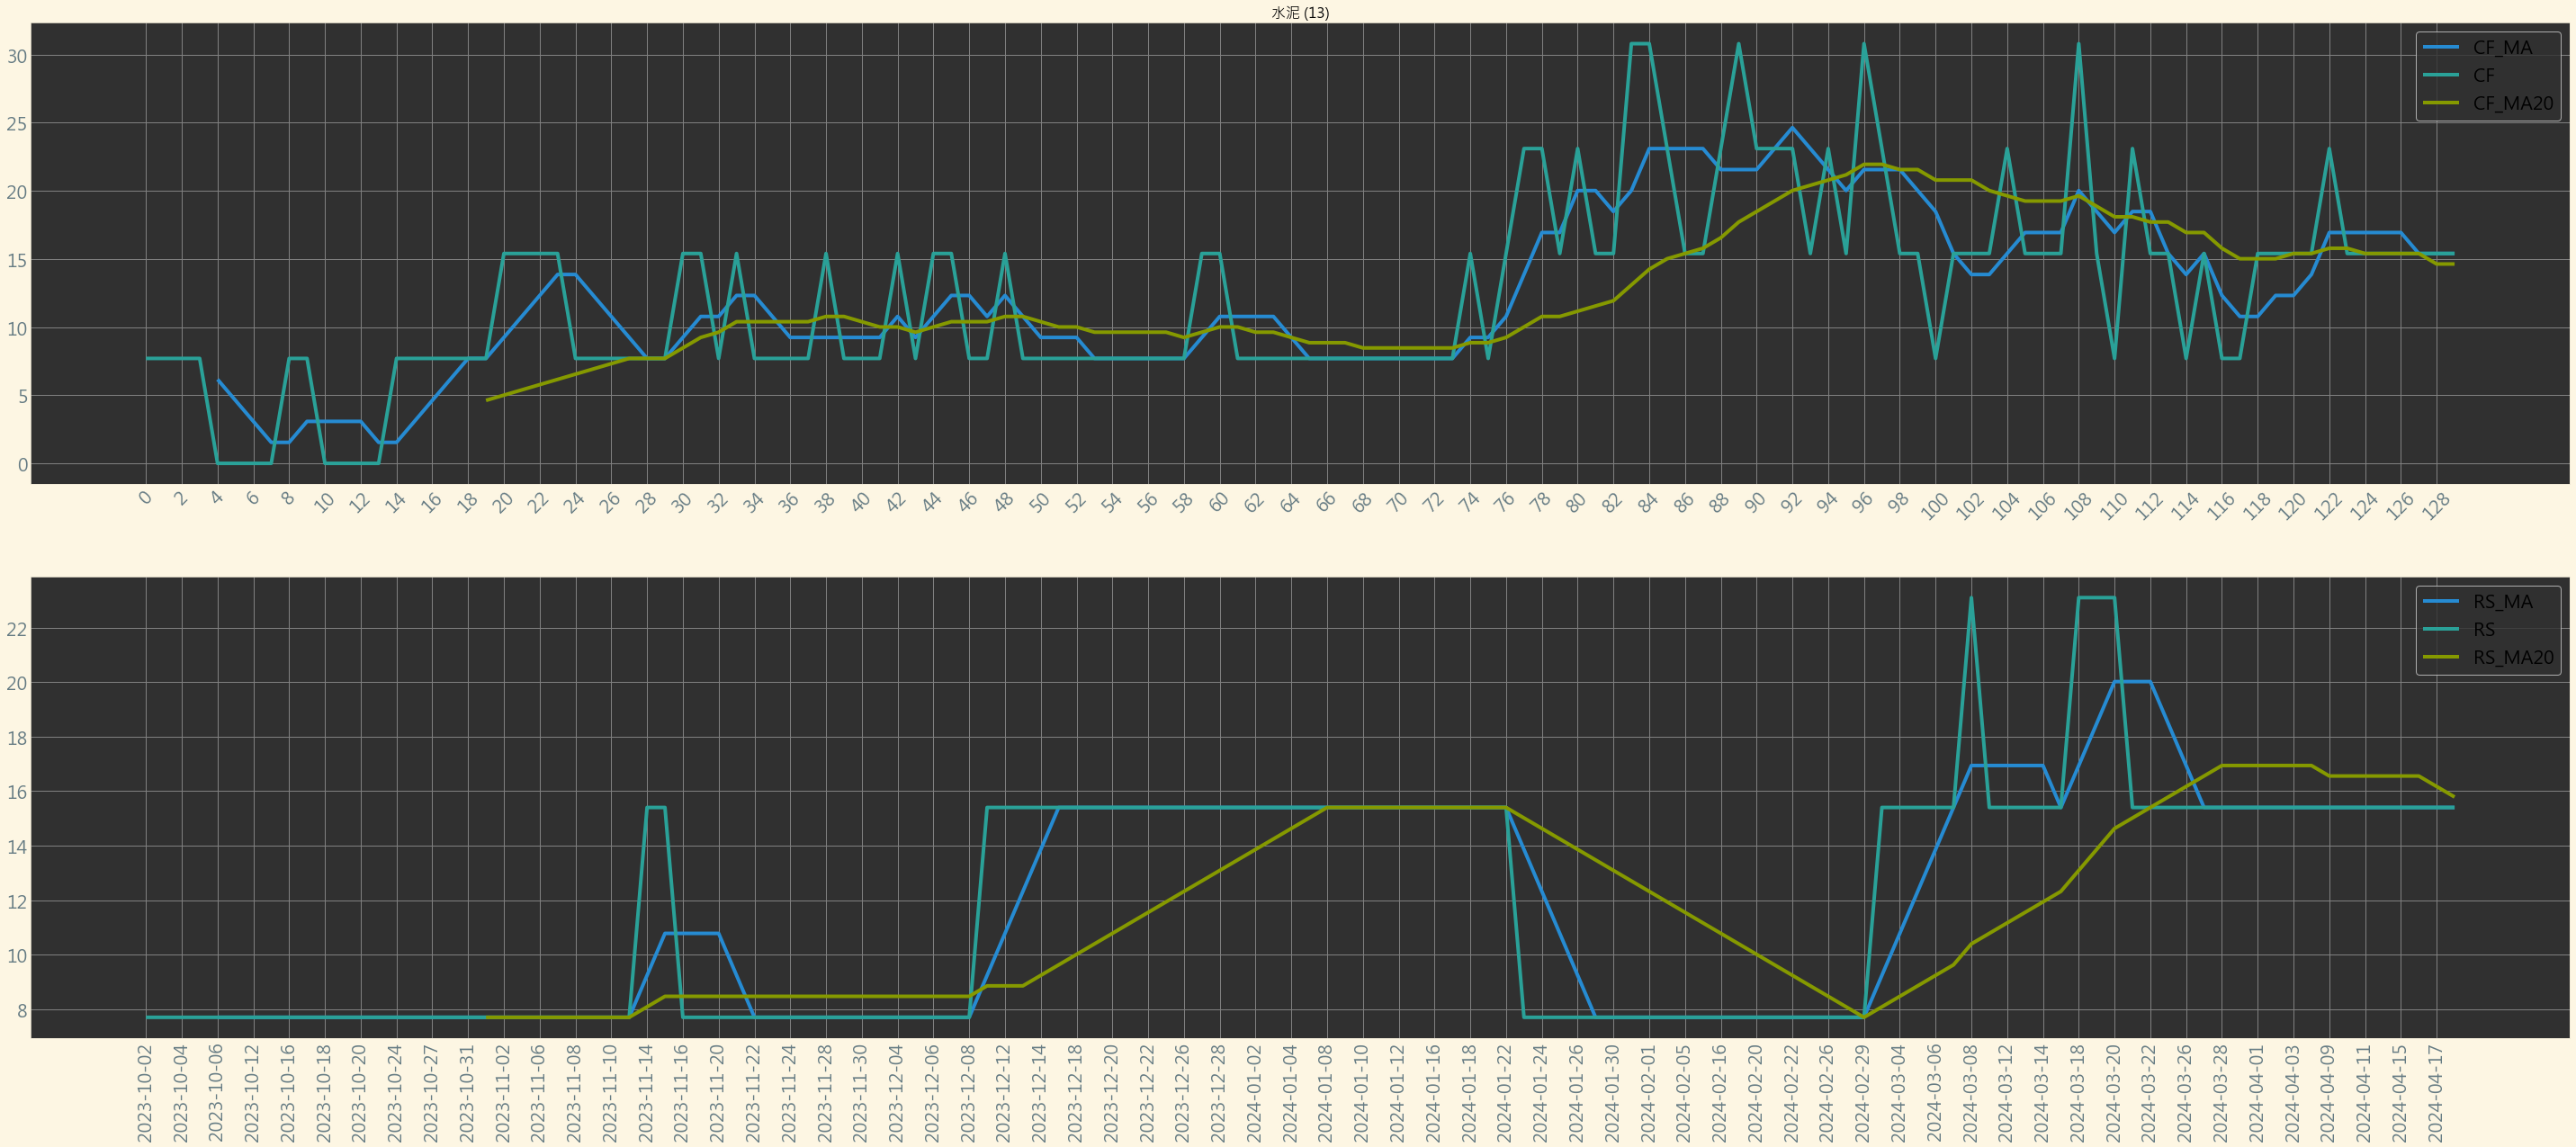

NameError: name 's' is not defined

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## set the background color of the plot to dark gray

t_list = '100產業 概念股 族群'.split(' ')
for t in t_list:
    #100產業
    rs_df = pd.read_excel(fr'C:\Users\User\Desktop\StockInfoHub\Stock_RS_rate_analysis\100產業分析\{t}RS排行.xlsx')
    rs_df.set_index('Unnamed: 0', inplace = True)
    # rs_df.drop(columns = ['Unnamed: 0'], inplace = True)
    rs_df.fillna(0, inplace = True)
    volume_df = pd.read_excel(fr'C:\Users\User\Desktop\StockInfoHub\Stock_RS_rate_analysis\100產業分析\{t}成交值排行(含權重).XLSX')
    volume_df.set_index('Unnamed: 0', inplace = True)
    # volume_df.drop(columns = ['Unnamed: 0'], inplace = True)
    volume_df.fillna(0, inplace = True)
    # true_volume_df = pd.read_excel(fr'C:\Users\User\Desktop\StockInfoHub\Stock_RS_rate_analysis\100產業分析\100產業實質成交值排行.XLSX')
    # true_volume_date = true_volume_df['Unnamed: 0'].iloc[1:199].values

    # true_volume_df.set_index('Unnamed: 0', inplace = True)
    # true_volume_df.drop(columns = ['Unnamed: 0'], inplace = True)
    # true_volume_df.fillna(0, inplace = True)
    col_names = rs_df.columns.tolist()
    print(col_names)
    rs_df.columns = [f'{col}_RS' for col in rs_df.columns]
    volume_df.columns = [f'{col}_CF' for col in volume_df.columns]
    concate_df = pd.concat([rs_df, volume_df], axis = 1)
    # concate_df.set_index('Unnamed: 0_RS', inplace = True)
    print(concate_df.columns)
    number = concate_df.loc['number']
    concate_df.drop('number', axis = 0, inplace = True)
    def MA(data, period):
        data = pd.Series(data.flatten())
        return data.rolling(window = period).mean()
    d = 400
    # maxmin scale
    from sklearn.preprocessing import MinMaxScaler
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
    plt.rcParams['font.size'] = 20
    plt.rcParams['axes.facecolor'] = '#303030'
    # use "warn" background style
    plt.style.use('fast')

    for col in col_names:
        if int(number.loc[f'{col}_RS']) < 5:
            continue
        CF = concate_df[f'{col}_CF'].astype(float)
        RS = concate_df[f'{col}_RS'].astype(float)
        plt.figure(figsize = (40, 16))
        scaler = MinMaxScaler()
        D = concate_df.index.values[:-d][::-1]
        # CF = scaler.fit_transform(CF.values.reshape(-1, 1))[:-d][::-1]
        CF = CF.values[:-d][::-1]
        print(len(CF))
        CF_ma = MA(CF, 5)
        CF_ma10 = MA(CF, 10)
        # RS = scaler.fit_transform(RS.values.reshape(-1, 1))[:-d][::-1]
        RS = RS.values[:-d][::-1]
        RS_ma = MA(RS, 5)
        RS_ma10 = MA(RS, 10)
        plt.subplot(2, 1, 1)
        plt.plot(D, CF_ma, label = 'CF_MA', linewidth = 4)
        plt.plot(D, CF, label = 'CF', linewidth = 4)
        plt.plot(D, CF_ma10, label = 'CF_MA10', linewidth = 4)
        # plt.scatter(D, CF, label = 'CF', s = 20)
        plt.xticks([i for i in range(0, len(D), 2)], [i for i in range(0, len(D), 2)], rotation = 45)
        plt.title(f'{col} ({int(number.loc[f"{col}_RS"])})')
        plt.legend()
        plt.grid(c = 'gray')
        plt.subplot(2, 1, 2)
        plt.plot(D, RS_ma, label = 'RS_MA', linewidth = 4)
        plt.plot(D, RS, label = 'RS', linewidth = 4)
        plt.plot(D, RS_ma10, label = 'RS_MA10', linewidth = 4)
        # plt.scatter(D, RS, label = 'RS', s = 20)
        plt.xticks([i for i in range(0, len(D), 2)], list(map(lambda x:x.split(' ')[0], D[::2])), rotation = 90)
        # plt.title(f'{col}')
        # legend font color
        plt.legend()
        plt.grid(c = 'gray')
        plt.savefig(f'C:/Users/User/Desktop/StockInfoHub/Stock_RS_rate_analysis/100產業分析/每日圖表加權({t})/{col}.png', bbox_inches = 'tight')
        # plt.show()

IC設計


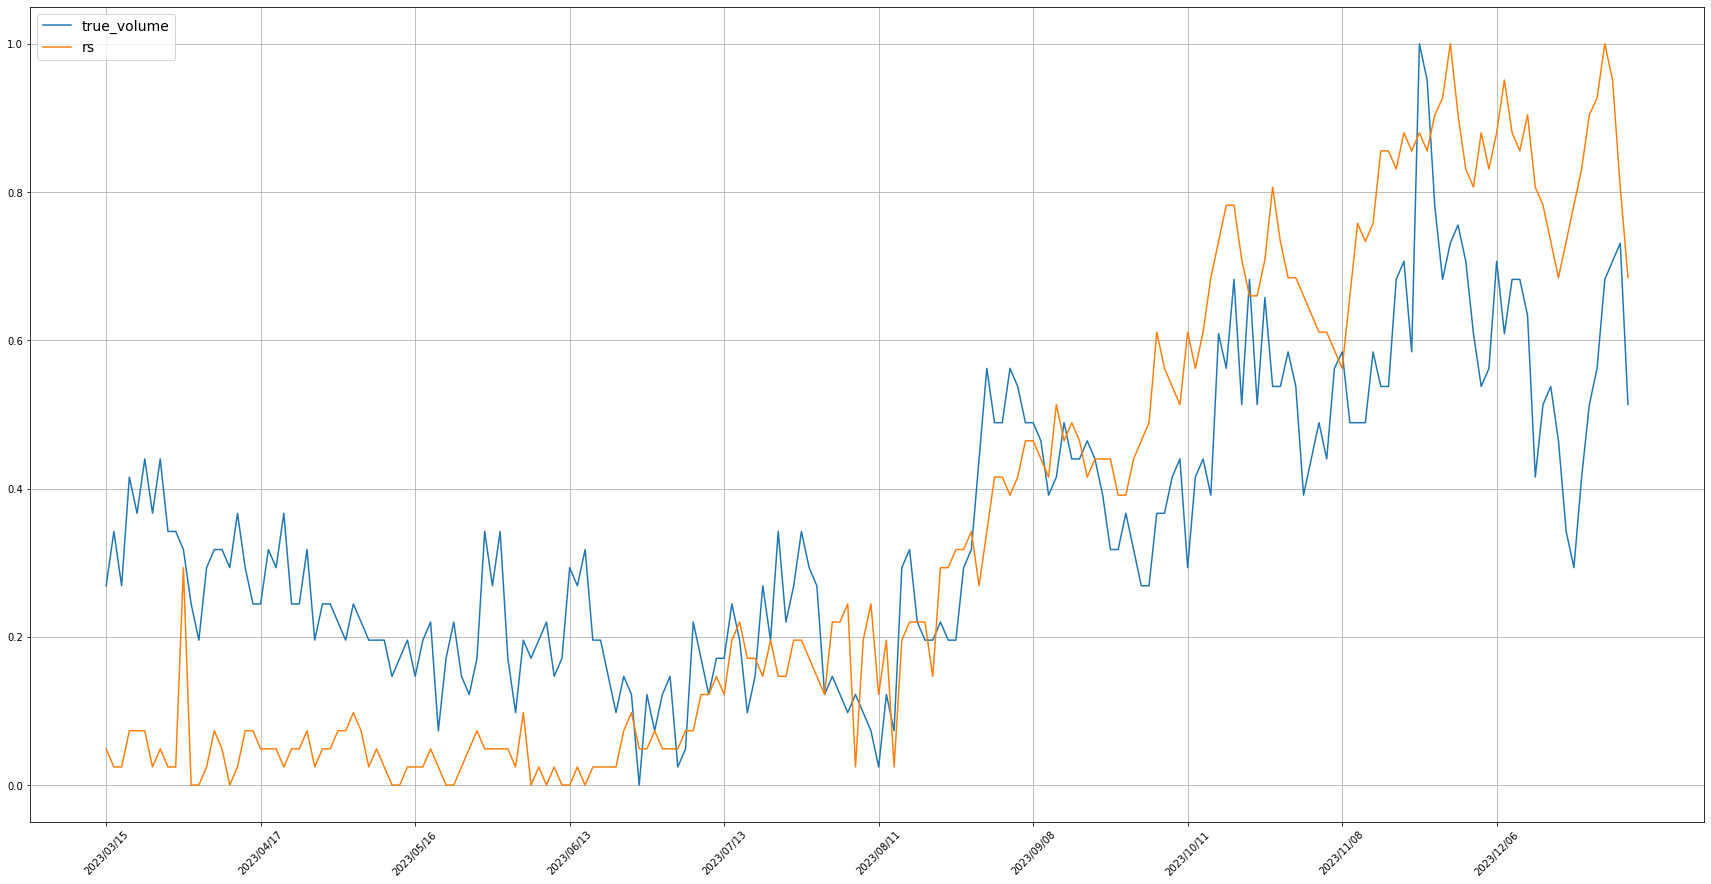

In [8]:

for col in ['IC設計']:
    true_volume_percentage = true_volume_df[col].iloc[1:199].astype(float).values
    scale2 = MinMaxScaler()
    true_volume_percentage = scale2.fit_transform(true_volume_percentage.reshape(-1,1)).reshape(-1)
    rs_percentage = rs_df[col].iloc[1:199].astype(float).values
    scale3 = MinMaxScaler()
    rs_percentage = scale3.fit_transform(rs_percentage.reshape(-1,1)).reshape(-1)
    print(col)
    plt.figure(figsize=(30,15))
    # plt.subplot(211)
    plt.plot(true_volume_df.index.values[1:199][::-1], true_volume_percentage, label = 'true_volume')
    plt.xticks(np.arange(1,199,20), true_volume_date[::-1][::20], rotation = 45)
    plt.plot(rs_df.index.values[1:199][::-1], rs_percentage, label = 'rs')
    plt.xticks(np.arange(1,199,20), true_volume_date[::-1][::20], rotation = 45)
    plt.grid()
    plt.legend(fontsize = 14)
    plt.show()
    # break

In [ ]:
for col in col_names:
    rs_percentage = rs_df[col].iloc[1:200].astype(float).values[::-1]
    # print(rs_percentage[:10])
    volume_percentage = volume_df[col].iloc[1:200].astype(float).values[::-1]
    # print(rs_percentage)
    true_volume_percentage = true_volume_df[col].iloc[1:200].astype(float).values[::-1]
    # print(true_volume_percentage)
    print(col)
    plt.figure(figsize=(30,20))
    plt.subplot(311)
    plt.plot(rs_percentage, label = 'rs')
    plt.grid()
    plt.legend()
    plt.subplot(312)
    plt.plot(volume_percentage, label = 'volume')
    plt.grid()
    plt.legend()
    plt.subplot(313)
    plt.plot(true_volume_percentage, label = 'true_volume')
    # plt.title(col)
    plt.grid()
    plt.legend()
    plt.show()
    # break